# Python Machine Learning

## ML = Computational Inferential Statistics

* y - what we're predicting / target
* x - what we know  / features


* Supervised - having the historical answers (x1, x2,... y)
    * Regression:  y is a real number, eg., 1.1, 2.4 
    * Classification: y is a discrete number, or label, eg., 0 or 1
        * binary classification: {-1, +1} -- two cases, postivie/negative
        
* Unsupervised learning - dont have historical answer, only (x1, x2, ...)
    * dimensionaity reduction (simplifying) -- taking (x1, ... x50) -> (x1, x2, x3)
        * keeping the important information (the information most discriminatnig)
        
    * clustering -- finding structure, or how common (x1, x2, x...) are 
        * what are the clusters? do (people, animals, products, ....) come in groups?
        * if so, what are they?

## Regression

* Finance
    * price of commodity

* Health
     * diet, weight
     
* Marketnig
    * click through rate, profit, spend...

## Exercise
* choose a problem
    * general a realistic x
    * use a linear equation to find y from x (ie., * + )
    * add an error term

* find the relationship with sklearn 

In [3]:
import numpy as np

In [14]:
e = np.random.normal(500, 250, 50)
x = np.random.normal(100, 25, 50) # purchases
y = 100*x + 50 + e # campaign spend

In [15]:
x[0], y[0], e[0]

(94.17552583135068, 10055.381141484642, 587.8285583495735)

In [20]:
x.shape

(50,)

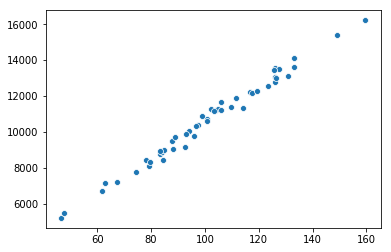

In [16]:
import seaborn as sns

sns.scatterplot(x, y);

In [17]:
from sklearn import linear_model

* choose model

In [18]:
reg = linear_model.LinearRegression()

* train / fit / learn

In [21]:
reg = reg.fit(x.reshape(-1, 1), y)

* deploy / predict

In [22]:
f = reg.predict

In [24]:
f([ [100], [80]])

array([10524.33691193,  8544.00876586])

In [32]:
reg.predict([ [100], [80], [125]])

array([10413.88913823,  8423.7847679 , 12901.51960115])

In [39]:
reg.intercept_

463.36728655153274

In [41]:
reg.coef_

array([99.50521852])

$f(x) = 99.5x + 464$

## Classification

* education
    * x1 -- units/week
    * x2 -- grade
    * y -- is the student still attending at 18mo?

In [26]:
x1 = np.random.normal(40, 20, 1000)
x2 = np.random.normal(55, 10, 1000)

y = (x1 < 30) | (x2 > 40)

In [27]:
x1[0], x2[0], y[0]

(45.98510018330905, 58.21602006286839, True)

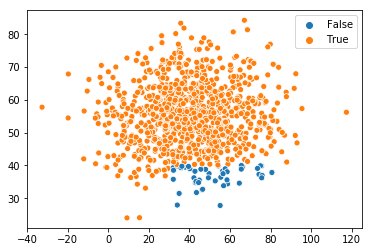

In [28]:
sns.scatterplot(x1, x2, hue=y);

In [31]:
np.c_[x1, x2]

array([[45.98510018, 58.21602006],
       [45.41366672, 55.9457747 ],
       [62.46766107, 57.21914762],
       ...,
       [51.36210146, 60.26536084],
       [37.95681617, 54.09853677],
       [ 9.55602041, 45.13229496]])

In [30]:
from sklearn.linear_model import LogisticRegression

cl = LogisticRegression(solver='lbfgs')
cl.fit(np.c_[x1, x2], y)
cl.predict([
    [50, 60],
    [20, 39],
    [80, 20]
])

array([ True,  True, False])

In [72]:
cl.predict_proba([
    [50, 60],
    [20, 39],
    [80, 20]
])

array([[2.76046647e-07, 9.99999724e-01],
       [7.24430546e-02, 9.27556945e-01],
       [9.99999870e-01, 1.29886625e-07]])

# Unsupervised: Clustering

In [1]:
sns.scatterplot(x1, x2)

NameError: name 'sns' is not defined

In [75]:
from sklearn.datasets import make_blobs

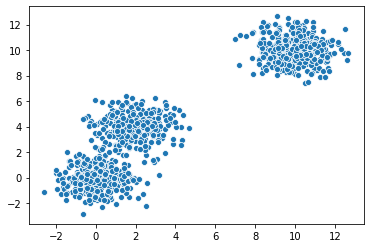

In [76]:
X, y = make_blobs(n_samples=[300, 300, 400], centers=[(2,4), (0,0), (10,10)], n_features=2, random_state=0)

sns.scatterplot(X[:, 0], X[:, 1])

In [ ]:
from sklearn.cluster import KMeans

KMeans.fit_predict()

## Set the problem up

* Regression
    * y -- tip
    * x -- total_bill, size

In [80]:
df = sns.load_dataset('tips')

In [88]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [85]:
x = df[['total_bill', 'size']].values
y = df['tip'].values

In [92]:
tipr = linear_model.LinearRegression()
tipr = tipr.fit(x, y)

In [93]:
tipr.predict([ [15.00, 4]])

array([2.83003597])

# Evaluation

In [77]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [97]:
tipr = linear_model.LinearRegression()
tipr = tipr.fit(X_train, y_train)

In [102]:
tipr.score(X_test, y_test)

0.5155737288137269

### Aside: visualizing the predictions

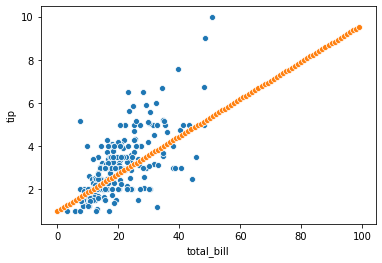

In [106]:
bill = np.arange(0, 100, 1)
size = np.repeat(1, 100)

sns.scatterplot(df['total_bill'], df['tip'])
sns.scatterplot(bill, tipr.predict(np.c_[bill, size]))

### Exercise

### Question 1: Regression
* Find the sklearn diabetes regression example using the sklearn documentation

* Create your own notebook of this example, partition each step into its own cell & inspect the relevant variables to understand the process

* When this is complete, investigate sklearn datasets

* Choose a different dataset (eg., breast cancer) and perform the same regression
    * you'll need to import it
    * choose some columns of the data set for your X
        * these will come from dataset.data
    * the target (y) is always dataset.target
        * this is an sklearn dataset convention

* EXTRA:
    * Choose more than one column from the features (dataset.data)
    * Investigate `train_test_split` and therefore use a better splitting strategy
    

### Cross-Validation

In [120]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# get data, est what the X is and what the y is
iris = load_iris()
X = iris.data
y = iris.target


# select the model
n = np.arange(1, 31) # n = n[n % 2 == 1]

hypers = { 'n_neighbors': n }
grid = GridSearchCV(KNeighborsClassifier(), hypers, cv = 5, scoring = 'accuracy')
grid.fit(X,y)

model = grid.best_estimator_
print(grid.best_score_, grid.best_params_)
print('x =', X[100], 'y_guess =', model.predict([ X[100] ]), 'answer =', y[100])

0.98 {'n_neighbors': 6}
x = [6.3 3.3 6.  2.5] y_guess = [2] answer = 2


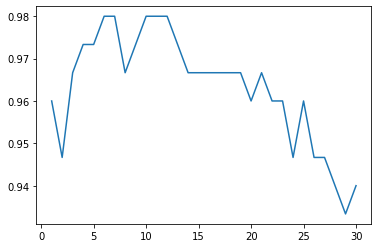

In [121]:
import seaborn as sns
sns.lineplot(n, grid.cv_results_['mean_test_score']);

In [118]:
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier()
cl = cl.fit(X, y)
cl.predict( [ X[0,:] ] )

array([0])